## Análisis de Regresión Lineal
#### Práctica

In [1]:
## Tratamiento de datos
import pandas as pd
import numpy as np
## Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
# Modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
path_file = r'C:/Users/nerid/Desktop/BD_Python/UPC/Regresión Lineal/'   

In [3]:
df=pd.read_csv(path_file+'LifeCycleSavings.csv',encoding = 'latin1',delimiter= ';')

In [4]:
df.shape

(50, 5)

In [5]:
df.head(10)

,pop15,pop75,dpi,ddpi,sr
0,29.35,2.87,2329.68,2.87,11.43
1,23.32,4.41,1507.99,3.93,12.07
2,23.80,4.43,2108.47,3.82,13.17
3,41.89,1.67,189.13,0.22,5.75
4,42.19,0.83,728.47,4.56,12.88
5,31.72,2.85,2982.88,2.43,8.79
6,39.74,1.34,662.86,2.67,0.60
7,44.75,0.67,289.52,6.51,11.90
8,46.64,1.06,276.65,3.08,4.98
9,47.64,1.14,471.24,2.80,10.78


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pop15   50 non-null     float64
 1   pop75   50 non-null     float64
 2   dpi     50 non-null     float64
 3   ddpi    50 non-null     float64
 4   sr      50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [7]:
df.isna().sum()

pop15    0
pop75    0
dpi      0
ddpi     0
sr       0
dtype: int64

In [8]:
df.corr()

,pop15,pop75,dpi,ddpi,sr
pop15,1.000000,-0.908479,-0.756188,-0.047826,-0.455538
pop75,-0.908479,1.000000,0.787000,0.025321,0.316521
dpi,-0.756188,0.787000,1.000000,-0.129486,0.220359
ddpi,-0.047826,0.025321,-0.129486,1.000000,0.304787
sr,-0.455538,0.316521,0.220359,0.304787,1.000000


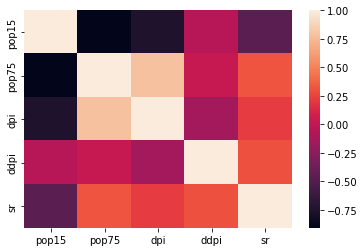

In [9]:
sns.heatmap(df.corr())

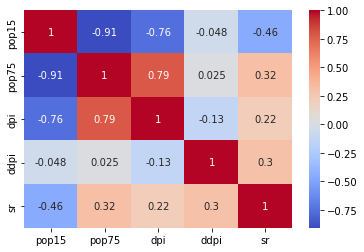

In [10]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

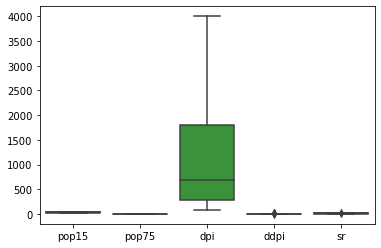

In [11]:
sns.boxplot(data=df)

In [12]:
X=df[['pop15','pop75','dpi','ddpi']]
y=df['sr']

In [14]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1280)

In [15]:
# Creamos una instancia del modelo en la variable lm
lm = LinearRegression()

In [16]:
# Entrenamos (ajustamos) el modelo con los datos de entrenamiento
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
# Pendiente
print("Pendiente: ",lm.coef_)
# Interceptor
print("Interceptor: ",lm.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Pendiente:  [-4.48071675e-01 -1.86332183e+00 -5.49077713e-04  3.70875341e-01]
Interceptor:  29.250604774843005


In [18]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
pop15,-0.448072
pop75,-1.863322
dpi,-0.000549
ddpi,0.370875


In [19]:
#Realizamos una predicción
Y_pred = lm.predict(X_test)
Y_pred

array([13.03926116,  7.38563634, 12.71986186, 11.09484329, 10.26303242,
        9.10342229, 11.18749786,  8.52329276,  8.66678245, 12.32920801])

In [20]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(sr=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(10)

,pop15,pop75,dpi,ddpi,sr,Pred
12,27.84,2.37,1681.25,4.32,11.24,13.039261
16,46.05,0.87,289.71,1.48,3.01,7.385636
36,31.92,1.52,250.96,2.00,13.30,12.719862
10,24.42,3.93,2496.53,3.99,16.85,11.094843
42,23.27,4.46,1813.93,2.01,7.81,10.263032
31,41.18,1.05,220.56,1.03,2.02,9.103422
46,41.12,1.73,380.47,10.23,7.72,11.187498
30,43.56,1.20,568.56,3.61,4.44,8.523293
40,43.42,1.08,389.66,2.96,5.13,8.666782
21,24.52,3.48,1390.00,3.54,14.28,12.329208


C:\Users\nerid\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


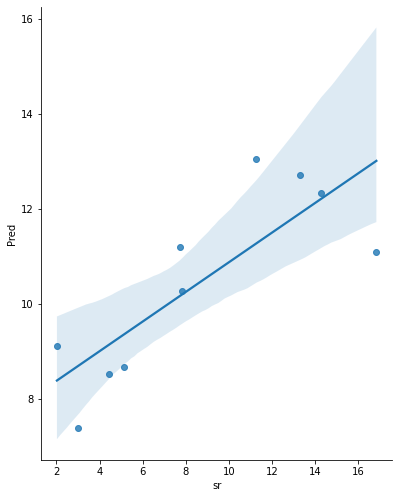

In [21]:
sns.pairplot(df_pred, x_vars=['sr'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

In [22]:
# calcular estas métricas a mano!
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

MAE: 3.508501211792127
MSE: 15.704540310420878
RMSE: 3.9628954453052225


In [23]:
# Precisiòn del Modelo
print("Precisión del Modelo: ",metrics.r2_score(y_test,Y_pred))

Precisión del Modelo:  0.3307819358920665


## Buen Trabajo!

### Gracias por Todo
#### Nérida Manrique Tunque